In [1]:
import game_v10
from player_p1 import PlayerP1
import numpy

Using TensorFlow backend.


In [2]:
game_train = game_v10.GameV10(mode="train")
#game_test = game_v10.GameV10(mode="test")

In [3]:
state_size = game_train.observation_space.shape[0]
action_size = game_train.action_space.n

In [4]:
player = PlayerP1(state_size, action_size)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [5]:
player.actor.load_weights("model/actor_weight.h5")
player.critic.load_weights("model/critic_weight.h5")

In [6]:
import pandas
import matplotlib.pyplot as plt
def heatmap_data(budget, player):
    n = 1000
    f1 = numpy.random.rand(n)
    f2 = numpy.abs(numpy.random.normal(0, 0.018, n))
    action_list = []
    prob_list = []
    for v1, v2 in zip(f1, f2):
        state = numpy.array([[v1, v2, budget]])
        #action = player.get_action(state)
        prob = player.get_action_prob(state)
        action = numpy.argmax(prob)
        prob_list.append(prob)
        action_list.append(action)
    df = pandas.DataFrame({"f1": f1, "f2": f2, "action": action_list, "prob": prob_list})
    #df["action"] = df["action_prob"].apply(lambda x: 1 if x >= 0.5 else 0)
    return df

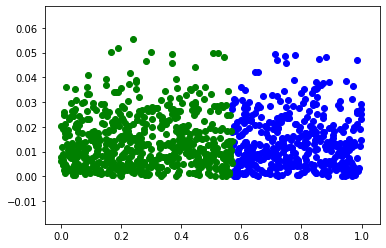

In [7]:
df = heatmap_data(0.55, player)
action_stay = df.query("action == 0")
action_long = df.query("action == 1")
action_short = df.query("action == 2")

plt.scatter(action_stay["f1"], action_stay["f2"], c="r")
plt.scatter(action_long["f1"], action_long["f2"], c="b")
plt.scatter(action_short["f1"], action_short["f2"], c="g")

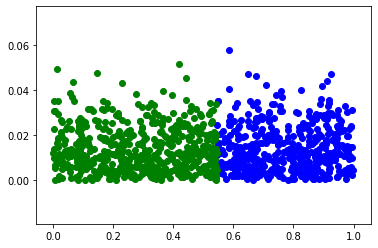

In [8]:
df = heatmap_data(0.2, player)
action_stay = df.query("action == 0")
action_long = df.query("action == 1")
action_short = df.query("action == 2")

plt.scatter(action_stay["f1"], action_stay["f2"], c="r")
plt.scatter(action_long["f1"], action_long["f2"], c="b")
plt.scatter(action_short["f1"], action_short["f2"], c="g")

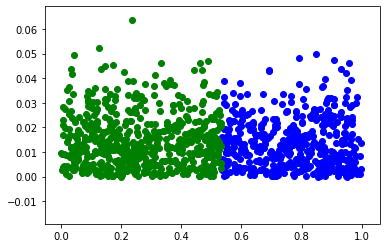

In [9]:
df = heatmap_data(-0.01, player)
action_stay = df.query("action == 0")
action_long = df.query("action == 1")
action_short = df.query("action == 2")

plt.scatter(action_stay["f1"], action_stay["f2"], c="r")
plt.scatter(action_long["f1"], action_long["f2"], c="b")
plt.scatter(action_short["f1"], action_short["f2"], c="g")

In [ ]:
df